팀에서 얼마나 홈런에 가치를 두는가 ?
-> 홈런 타자에게 팀 돈에서 얼마를 쓰는가 -> 에 대한 지표

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
import time
import mysql.connector

mykbodb = mysql.connector.connect(
    host = "database-1.cnusogkkql3j.us-east-2.rds.amazonaws.com",
    user = 'EDA_project',
    port = 3306,
    password = '1234',
    database = 'KBO'
)

In [3]:
mykbocursor = mykbodb.cursor()

In [4]:
mykbocursor.execute("SELECT * FROM 팀기록_타자")

teambatresult = mykbocursor.fetchall()

teambat = pd.DataFrame(teambatresult)
teambat
mykbocursor.execute("DESC 팀기록_타자")

teambat_renamecolumn = []
for x in mykbocursor:
    teambat_renamecolumn.append(x[0])

teambat.columns = teambat_renamecolumn
teambat = teambat[['year', '팀_순위', '팀_이름', '팀_타율', '홈런', '장타율_주루율', '특점권타율', '출루율']]
teambat.rename(columns={'특점권타율' : '득점권타율', '장타율_주루율':'장타율+주루율'}, inplace=True)

teambat22 = teambat.loc[teambat['year'] == 22]
teambat23 = teambat.loc[teambat['year'] == 23]
teambat24 = teambat.loc[teambat['year'] == 24]

teambat22.set_index(['팀_이름'], inplace=True)
teambat23.set_index(['팀_이름'], inplace=True)
teambat24.set_index(['팀_이름'], inplace=True)

teambat22 = teambat22.sort_values(by='팀_순위')
teambat23 = teambat23.sort_values(by='팀_순위')
teambat24 = teambat24.sort_values(by='팀_순위')


In [5]:
mykbocursor.execute("SELECT * FROM 팀기록_주루")

teamrunresult = mykbocursor.fetchall()

teamrun = pd.DataFrame(teamrunresult)

mykbocursor.execute("DESC 팀기록_주루")

teamrun_renamecolumn = []
for x in mykbocursor:
    teamrun_renamecolumn.append(x[0])

teamrun.columns = teamrun_renamecolumn
teamrun = teamrun[['year', '팀_순위', '팀_이름','도루성공률']]
teambatresult
teamrun22 = teamrun.loc[teamrun['year'] == 2022]
teamrun23 = teamrun.loc[teamrun['year'] == 2023]
teamrun24 = teamrun.loc[teamrun['year'] == 2024]

teamrun22.set_index(['팀_이름'], inplace=True)
teamrun23.set_index(['팀_이름'], inplace=True)
teamrun24.set_index(['팀_이름'], inplace=True)


teamrun22 = teamrun22.sort_values(by='팀_순위')
teamrun23 = teamrun23.sort_values(by='팀_순위')
teamrun24 = teamrun24.sort_values(by='팀_순위')

In [6]:
teambat23

,year,팀_순위,팀_타율,홈런,장타율+주루율,득점권타율,출루율
팀_이름,,,,,,,
LG,23,1,0.279,93,0.755,0.298,0.361
KIA,23,2,0.276,101,0.735,0.300,0.345
NC,23,3,0.270,98,0.732,0.268,0.345
KT,23,4,0.265,89,0.709,0.276,0.338
롯데,23,5,0.265,69,0.700,0.288,0.338
삼성,23,6,0.263,88,0.702,0.267,0.334
키움,23,7,0.261,61,0.684,0.258,0.331
SSG,23,8,0.260,125,0.725,0.254,0.336
두산,23,9,0.255,100,0.705,0.242,0.332


In [7]:
teambat22['도루성공률'] = teamrun22['도루성공률']

teambat23['도루성공률'] = teamrun23['도루성공률']

teambat24['도루성공률'] = teamrun24['도루성공률']

teambat23

,year,팀_순위,팀_타율,홈런,장타율+주루율,득점권타율,출루율,도루성공률
팀_이름,,,,,,,,
LG,23,1,0.279,93,0.755,0.298,0.361,62.2
KIA,23,2,0.276,101,0.735,0.300,0.345,78.2
NC,23,3,0.270,98,0.732,0.268,0.345,70.7
KT,23,4,0.265,89,0.709,0.276,0.338,74.4
롯데,23,5,0.265,69,0.700,0.288,0.338,70.6
삼성,23,6,0.263,88,0.702,0.267,0.334,74.6
키움,23,7,0.261,61,0.684,0.258,0.331,83.1
SSG,23,8,0.260,125,0.725,0.254,0.336,77.4
두산,23,9,0.255,100,0.705,0.242,0.332,73.5


In [8]:
mykbocursor.execute("SELECT * FROM 연도별_팀순위")

teamrankresult = mykbocursor.fetchall()

teamrank = pd.DataFrame(teamrankresult)
teamrank

mykbocursor.execute("DESC 연도별_팀순위")

teamrank_renamecolumn = []
for x in mykbocursor:
    teamrank_renamecolumn.append(x[0])
teamrank.columns = teamrank_renamecolumn

teamrank22 = teamrank.loc[teambat['year'] == 22]
teamrank23 = teamrank.loc[teambat['year'] == 23]
teamrank24 = teamrank.loc[teambat['year'] == 24]


teamrank22.set_index(['팀명'], inplace=True)
teamrank23.set_index(['팀명'], inplace=True)
teamrank24.set_index(['팀명'], inplace=True)

teamrank22 = teamrank22.sort_values(by='순위')
teamrank23 = teamrank23.sort_values(by='순위')
teamrank24 = teamrank24.sort_values(by='순위')

teambat22['팀_순위']=teamrank22['순위']
teambat22.sort_values(by = '팀_순위', inplace=True)

teambat23['팀_순위']=teamrank23['순위']
teambat23.sort_values(by = '팀_순위', inplace=True)

teambat24['팀_순위']=teamrank24['순위']
teambat24.sort_values(by = '팀_순위', inplace=True)
#teambat24['팀_순위']=teamrank24['순위']

In [9]:

teambat22

,year,팀_순위,팀_타율,홈런,장타율+주루율,득점권타율,출루율,도루성공률
팀_이름,,,,,,,,
SSG,22,1,0.254,138,0.732,0.272,0.336,71.5
키움,22,2,0.252,94,0.697,0.243,0.333,75.9
LG,22,3,0.269,118,0.742,0.274,0.346,68.9
KT,22,4,0.254,119,0.705,0.239,0.330,72.4
KIA,22,5,0.272,113,0.747,0.273,0.349,75.2
NC,22,6,0.257,105,0.709,0.265,0.334,71.9
삼성,22,7,0.270,103,0.721,0.281,0.334,77.1
롯데,22,8,0.267,106,0.711,0.259,0.328,61.0
두산,22,9,0.255,101,0.689,0.266,0.324,69.2


In [10]:
teambat23

,year,팀_순위,팀_타율,홈런,장타율+주루율,득점권타율,출루율,도루성공률
팀_이름,,,,,,,,
LG,23,1,0.279,93,0.755,0.298,0.361,62.2
KT,23,2,0.265,89,0.709,0.276,0.338,74.4
SSG,23,3,0.260,125,0.725,0.254,0.336,77.4
NC,23,4,0.270,98,0.732,0.268,0.345,70.7
두산,23,5,0.255,100,0.705,0.242,0.332,73.5
KIA,23,6,0.276,101,0.735,0.300,0.345,78.2
롯데,23,7,0.265,69,0.700,0.288,0.338,70.6
삼성,23,8,0.263,88,0.702,0.267,0.334,74.6
한화,23,9,0.241,100,0.674,0.240,0.324,75.3


In [11]:
teambat24

,year,팀_순위,팀_타율,홈런,장타율+주루율,득점권타율,출루율,도루성공률
팀_이름,,,,,,,,
KIA,24,1,0.294,92,0.819,0.313,0.369,73.5
LG,24,2,0.282,62,0.774,0.287,0.369,68.8
삼성,24,3,0.262,88,0.744,0.259,0.341,82.1
두산,24,4,0.280,85,0.772,0.283,0.347,78.3
SSG,24,5,0.274,78,0.758,0.276,0.349,76.5
NC,24,6,0.270,93,0.778,0.256,0.359,76.7
롯데,24,7,0.284,64,0.776,0.291,0.348,72.3
한화,24,8,0.268,70,0.745,0.289,0.349,63.0
KT,24,9,0.272,89,0.765,0.266,0.353,72.4


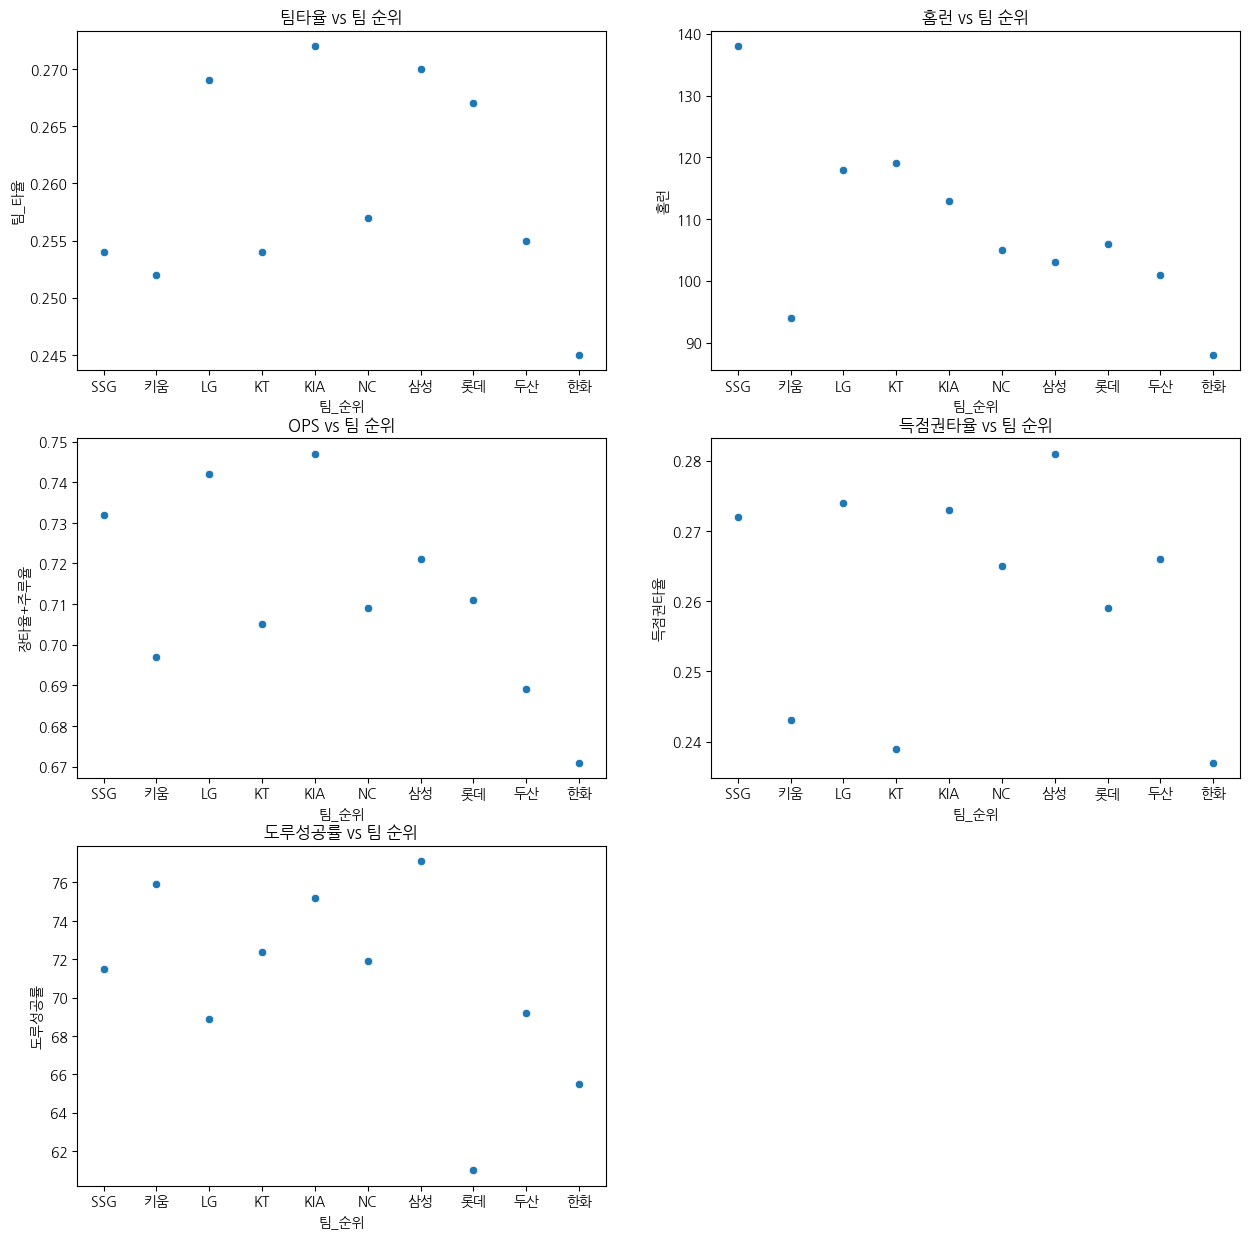

In [12]:
from matplotlib.ticker import MultipleLocator

fig,axes = plt.subplots(3, 2, figsize = (15, 15))


sns.scatterplot(y = '팀_타율', x = '팀_순위', data = teambat22, ax = axes[0,0])
axes[0, 0].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[0, 0].xaxis.set_major_locator(MultipleLocator(1))
axes[0, 0].set_title('팀타율 vs 팀 순위')
axes[0, 0].set_xticks(teambat22['팀_순위']) 
axes[0, 0].set_xticklabels(teambat22.index)

sns.scatterplot(y = '홈런', x = '팀_순위', data = teambat22, ax = axes[0,1])
axes[0, 1].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[0, 1].xaxis.set_major_locator(MultipleLocator(1))
axes[0, 1].set_title('홈런 vs 팀 순위')
axes[0, 1].set_xticks(teambat22['팀_순위']) 
axes[0, 1].set_xticklabels(teambat22.index)

sns.scatterplot(y = '장타율+주루율', x = '팀_순위', data = teambat22, ax = axes[1,0])
axes[1, 0].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[1, 0].xaxis.set_major_locator(MultipleLocator(1))
axes[1, 0].set_title('OPS vs 팀 순위')
axes[1, 0].set_xticks(teambat22['팀_순위']) 
axes[1, 0].set_xticklabels(teambat22.index)

sns.scatterplot(y = '득점권타율', x = '팀_순위', data = teambat22, ax = axes[1,1])
axes[1, 1].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[1, 1].xaxis.set_major_locator(MultipleLocator(1))
axes[1, 1].set_title('득점권타율 vs 팀 순위')
axes[1, 1].set_xticks(teambat22['팀_순위']) 
axes[1, 1].set_xticklabels(teambat22.index)

sns.scatterplot(y = '도루성공률', x = '팀_순위', data = teambat22, ax = axes[2,0])
axes[2, 0].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[2, 0].xaxis.set_major_locator(MultipleLocator(1))
axes[2, 0].set_title('도루성공률 vs 팀 순위')
axes[2, 0].set_xticks(teambat22['팀_순위']) 
axes[2, 0].set_xticklabels(teambat22.index)


#for ax in axes.flat:
#    ax.label_outer()
# 빈 서브플롯 제거

fig.delaxes(axes[2, 1])


plt.show()

In [13]:
teambat23

,year,팀_순위,팀_타율,홈런,장타율+주루율,득점권타율,출루율,도루성공률
팀_이름,,,,,,,,
LG,23,1,0.279,93,0.755,0.298,0.361,62.2
KT,23,2,0.265,89,0.709,0.276,0.338,74.4
SSG,23,3,0.260,125,0.725,0.254,0.336,77.4
NC,23,4,0.270,98,0.732,0.268,0.345,70.7
두산,23,5,0.255,100,0.705,0.242,0.332,73.5
KIA,23,6,0.276,101,0.735,0.300,0.345,78.2
롯데,23,7,0.265,69,0.700,0.288,0.338,70.6
삼성,23,8,0.263,88,0.702,0.267,0.334,74.6
한화,23,9,0.241,100,0.674,0.240,0.324,75.3


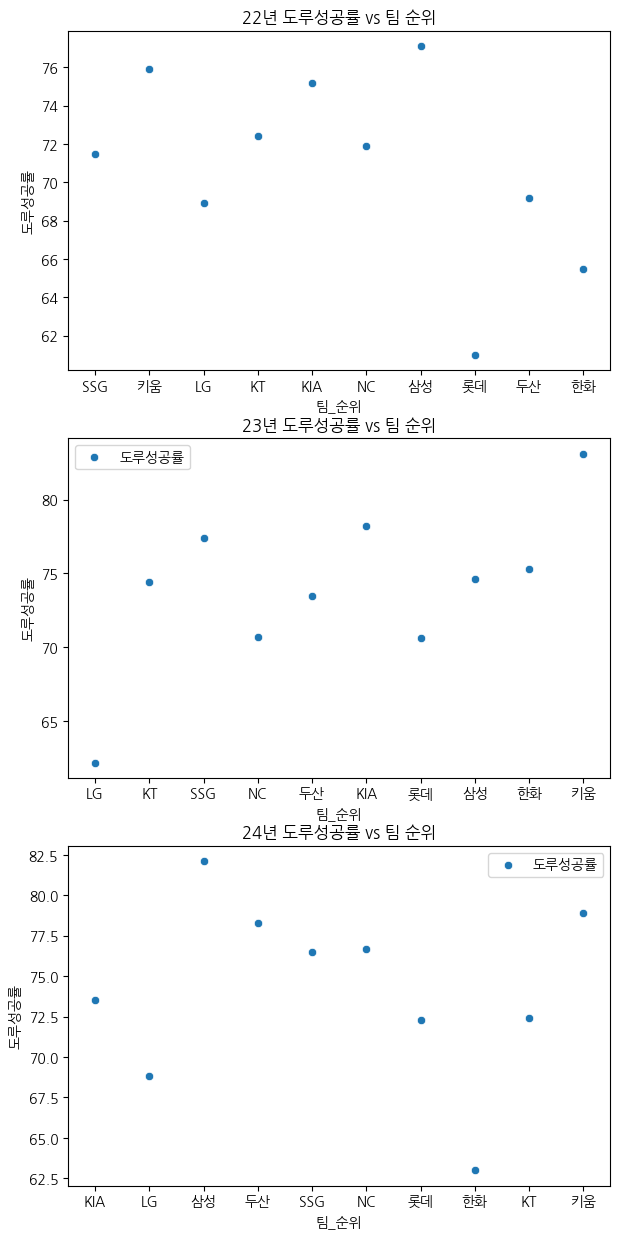

In [14]:
from matplotlib.ticker import MultipleLocator

fig,axes = plt.subplots(3, 1, figsize = (7, 15))


sns.scatterplot(y='도루성공률', x='팀_순위', data=teambat22, ax=axes[0])
axes[0].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[0].xaxis.set_major_locator(MultipleLocator(1))
axes[0].set_title('22년 도루성공률 vs 팀 순위')
axes[0].set_xticks(teambat22['팀_순위']) 
axes[0].set_xticklabels(teambat22.index)


sns.scatterplot(y='도루성공률', x='팀_순위', data=teambat23, ax=axes[1], label='도루성공률')
axes[1].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[1].xaxis.set_major_locator(MultipleLocator(1))
axes[1].set_title('23년 도루성공률 vs 팀 순위')
axes[1].set_xticks(teambat23['팀_순위']) 
axes[1].set_xticklabels(teambat23.index)

sns.scatterplot(y='도루성공률', x='팀_순위', data=teambat24, ax=axes[2], label='도루성공률')
axes[2].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[2].xaxis.set_major_locator(MultipleLocator(1))
axes[2].set_title('24년 도루성공률 vs 팀 순위')
axes[2].set_xticks(teambat24['팀_순위']) 
axes[2].set_xticklabels(teambat24.index)


#for ax in axes.flat:
#    ax.label_outer()
# 빈 서브플롯 제거


plt.show()

In [15]:
teambat24.sort_values(by='출루율', ascending= False)

,year,팀_순위,팀_타율,홈런,장타율+주루율,득점권타율,출루율,도루성공률
팀_이름,,,,,,,,
KIA,24,1,0.294,92,0.819,0.313,0.369,73.5
LG,24,2,0.282,62,0.774,0.287,0.369,68.8
NC,24,6,0.270,93,0.778,0.256,0.359,76.7
KT,24,9,0.272,89,0.765,0.266,0.353,72.4
키움,24,10,0.279,61,0.750,0.283,0.351,78.9
SSG,24,5,0.274,78,0.758,0.276,0.349,76.5
한화,24,8,0.268,70,0.745,0.289,0.349,63.0
롯데,24,7,0.284,64,0.776,0.291,0.348,72.3
두산,24,4,0.280,85,0.772,0.283,0.347,78.3


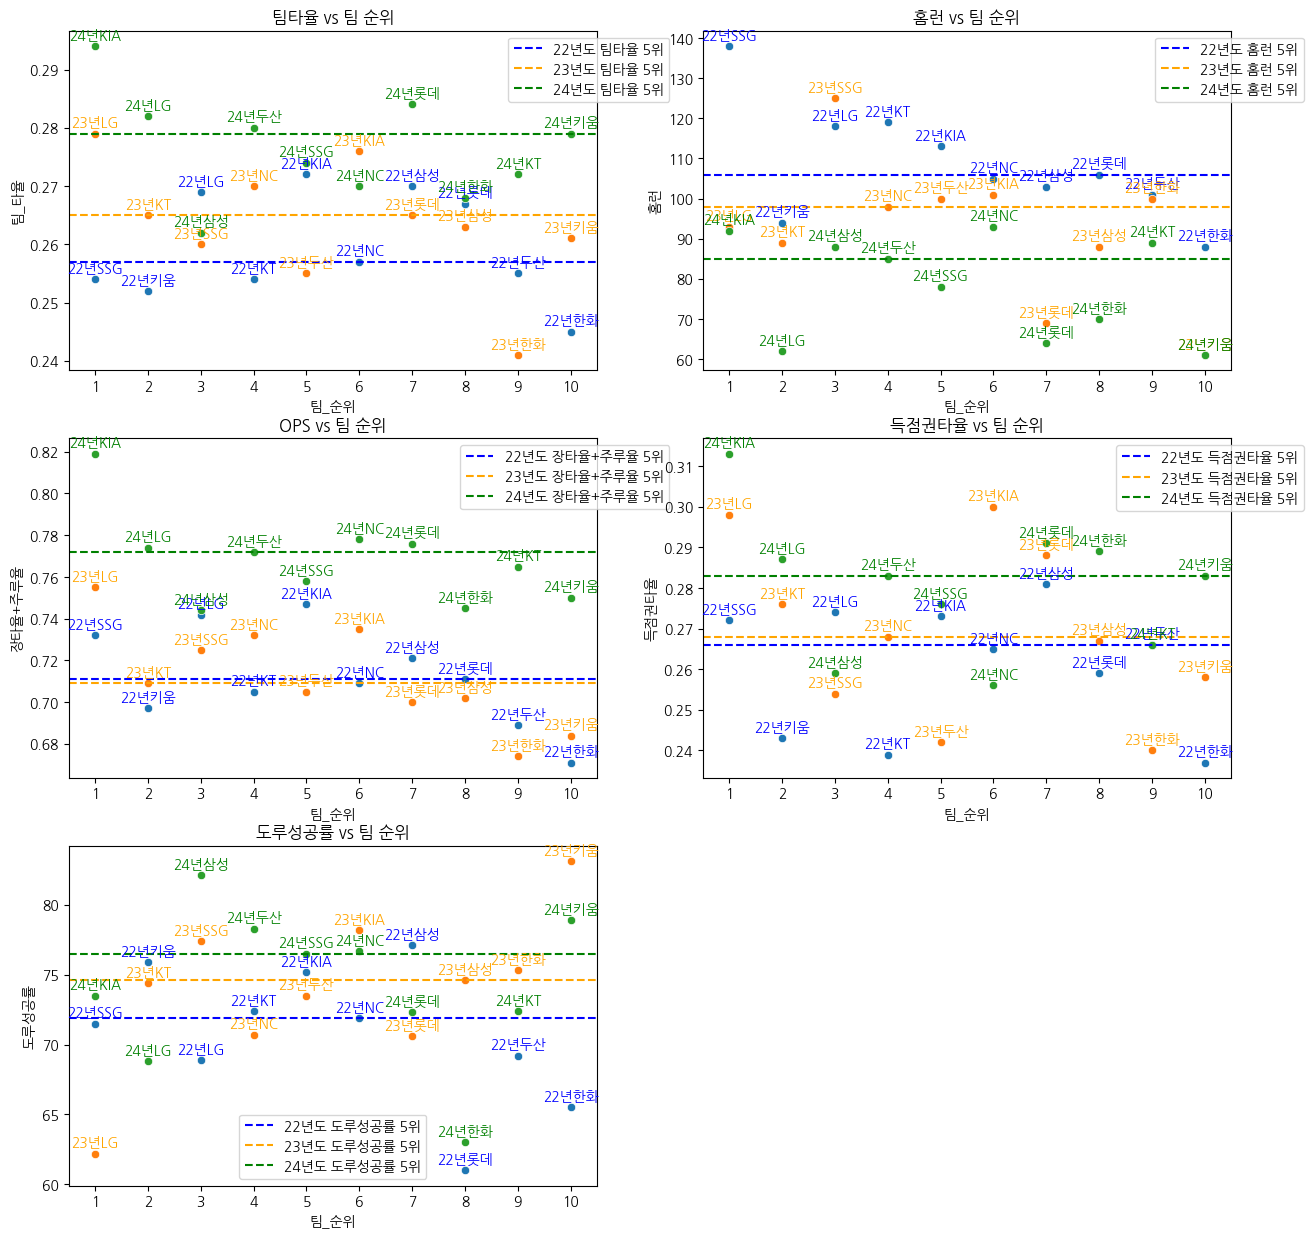

In [16]:
from matplotlib.ticker import MultipleLocator

fig,axes = plt.subplots(3, 2, figsize = (15, 15))


sns.scatterplot(y = '팀_타율', x = '팀_순위', data = teambat22, ax = axes[0,0])
sns.scatterplot(y = '팀_타율', x = '팀_순위', data = teambat23, ax = axes[0,0])
sns.scatterplot(y = '팀_타율', x = '팀_순위', data = teambat24, ax = axes[0,0])
axes[0, 0].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[0, 0].xaxis.set_major_locator(MultipleLocator(1))
axes[0, 0].set_title('팀타율 vs 팀 순위')
axes[0, 0].set_xticks(teambat22['팀_순위']) 

for i, row in teambat22.iterrows():
    axes[0, 0].annotate('22년'+ row.name, (row['팀_순위'], row['팀_타율']), textcoords="offset points", xytext=(0,5), ha='center', color = 'blue')
for i, row in teambat23.iterrows():
    axes[0, 0].annotate('23년'+ row.name, (row['팀_순위'], row['팀_타율']), textcoords="offset points", xytext=(0,5), ha='center', color = 'orange')
for i, row in teambat24.iterrows():
    axes[0, 0].annotate('24년'+ row.name, (row['팀_순위'], row['팀_타율']), textcoords="offset points", xytext=(0,5), ha='center', color = 'green')

teambat22_sorted = teambat22.sort_values(by='팀_타율', ascending=False)
teambat23_sorted = teambat23.sort_values(by='팀_타율', ascending=False)
teambat24_sorted = teambat24.sort_values(by='팀_타율', ascending=False)

axes[0,0].axhline(y=teambat22_sorted.iloc[4]['팀_타율'], color='blue', linestyle='--', label=f'22년도 팀타율 5위')
axes[0,0].axhline(y=teambat23_sorted.iloc[4]['팀_타율'], color='orange', linestyle='--', label=f'23년도 팀타율 5위')
axes[0,0].axhline(y=teambat24_sorted.iloc[4]['팀_타율'], color='green', linestyle='--', label=f'24년도 팀타율 5위')
axes[0,0].legend(loc = 'upper right', bbox_to_anchor = (1.15,1))
##################################################################################################################################################
sns.scatterplot(y = '홈런', x = '팀_순위', data = teambat22, ax = axes[0,1])
sns.scatterplot(y = '홈런', x = '팀_순위', data = teambat23, ax = axes[0,1])
sns.scatterplot(y = '홈런', x = '팀_순위', data = teambat24, ax = axes[0,1])
axes[0, 1].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[0, 1].xaxis.set_major_locator(MultipleLocator(1))
axes[0, 1].set_title('홈런 vs 팀 순위')
axes[0, 1].set_xticks(teambat22['팀_순위']) 
for i, row in teambat22.iterrows():
    axes[0, 1].annotate('22년'+ row.name, (row['팀_순위'], row['홈런']), textcoords="offset points", xytext=(0,5), ha='center', color = 'blue')
for i, row in teambat23.iterrows():
    axes[0, 1].annotate('23년'+ row.name, (row['팀_순위'], row['홈런']), textcoords="offset points", xytext=(0,5), ha='center', color = 'orange')
for i, row in teambat24.iterrows():
    axes[0, 1].annotate('24년'+ row.name, (row['팀_순위'], row['홈런']), textcoords="offset points", xytext=(0,5), ha='center', color = 'green')
#axes[0,1].axhline(y=teambat22.loc[teambat22['팀_순위'] == 5, '홈런'].values[0], color='blue', linestyle='--', label=f'22년도 5위')
#axes[0,1].axhline(y=teambat23.loc[teambat23['팀_순위'] == 5, '홈런'].values[0], color='orange', linestyle='--', label=f'23년도 5위')
#axes[0,1].axhline(y=teambat24.loc[teambat24['팀_순위'] == 5, '홈런'].values[0], color='green', linestyle='--', label=f'24년도 5위')

teambat22_sorted = teambat22.sort_values(by='홈런', ascending=False)
teambat23_sorted = teambat23.sort_values(by='홈런', ascending=False)
teambat24_sorted = teambat24.sort_values(by='홈런', ascending=False)

axes[0,1].axhline(y = teambat22_sorted.iloc[4]['홈런'], color='blue', linestyle='--', label=f'22년도 홈런 5위')
axes[0,1].axhline(y = teambat23_sorted.iloc[4]['홈런'], color='orange', linestyle='--', label=f'23년도 홈런 5위')
axes[0,1].axhline(y = teambat24_sorted.iloc[4]['홈런'], color='green', linestyle='--', label=f'24년도 홈런 5위')

axes[0,1].legend(loc = 'upper right', bbox_to_anchor = (1.15,1))

##################################################################################################################################################
sns.scatterplot(y = '장타율+주루율', x = '팀_순위', data = teambat22, ax = axes[1,0])
sns.scatterplot(y = '장타율+주루율', x = '팀_순위', data = teambat23, ax = axes[1,0])
sns.scatterplot(y = '장타율+주루율', x = '팀_순위', data = teambat24, ax = axes[1,0])
axes[1, 0].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[1, 0].xaxis.set_major_locator(MultipleLocator(1))
axes[1, 0].set_title('OPS vs 팀 순위')
axes[1, 0].set_xticks(teambat22['팀_순위']) 


for i, row in teambat22.iterrows():
    axes[1, 0].annotate('22년'+ row.name, (row['팀_순위'], row['장타율+주루율']), textcoords="offset points", xytext=(0,5), ha='center', color = 'blue')
for i, row in teambat23.iterrows():
    axes[1, 0].annotate('23년'+ row.name, (row['팀_순위'], row['장타율+주루율']), textcoords="offset points", xytext=(0,5), ha='center', color = 'orange')
for i, row in teambat24.iterrows():
    axes[1, 0].annotate('24년'+ row.name, (row['팀_순위'], row['장타율+주루율']), textcoords="offset points", xytext=(0,5), ha='center', color = 'green')

#axes[1, 0].axhline(y=teambat22.loc[teambat22['팀_순위'] == 5, '장타율+주루율'].values[0], color='blue', linestyle='--', label=f'22년도 5위')
#axes[1, 0].axhline(y=teambat23.loc[teambat23['팀_순위'] == 5, '장타율+주루율'].values[0], color='orange', linestyle='--', label=f'23년도 5위')
#axes[1, 0].axhline(y=teambat24.loc[teambat24['팀_순위'] == 5, '장타율+주루율'].values[0], color='green', linestyle='--', label=f'24년도 5위')

teambat22_sorted = teambat22.sort_values(by='장타율+주루율', ascending=False)
teambat23_sorted = teambat23.sort_values(by='장타율+주루율', ascending=False)
teambat24_sorted = teambat24.sort_values(by='장타율+주루율', ascending=False)

axes[1, 0].axhline(y = teambat22_sorted.iloc[4]['장타율+주루율'], color='blue', linestyle='--', label=f'22년도 장타율+주루율 5위')
axes[1, 0].axhline(y = teambat23_sorted.iloc[4]['장타율+주루율'], color='orange', linestyle='--', label=f'23년도 장타율+주루율 5위')
axes[1, 0].axhline(y = teambat24_sorted.iloc[4]['장타율+주루율'], color='green', linestyle='--', label=f'24년도 장타율+주루율 5위')

axes[1, 0].legend(loc = 'upper right', bbox_to_anchor = (1.15,1))

##################################################################################################################################################
sns.scatterplot(y = '득점권타율', x = '팀_순위', data = teambat22, ax = axes[1,1])
sns.scatterplot(y = '득점권타율', x = '팀_순위', data = teambat23, ax = axes[1,1])
sns.scatterplot(y = '득점권타율', x = '팀_순위', data = teambat24, ax = axes[1,1])
axes[1, 1].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[1, 1].xaxis.set_major_locator(MultipleLocator(1))
axes[1, 1].set_title('득점권타율 vs 팀 순위')
axes[1, 1].set_xticks(teambat22['팀_순위']) 


for i, row in teambat22.iterrows():
    axes[1, 1].annotate('22년'+ row.name, (row['팀_순위'], row['득점권타율']), textcoords="offset points", xytext=(0,5), ha='center', color = 'blue')
for i, row in teambat23.iterrows():
    axes[1, 1].annotate('23년'+ row.name, (row['팀_순위'], row['득점권타율']), textcoords="offset points", xytext=(0,5), ha='center', color = 'orange')
for i, row in teambat24.iterrows():
    axes[1, 1].annotate('24년'+ row.name, (row['팀_순위'], row['득점권타율']), textcoords="offset points", xytext=(0,5), ha='center', color = 'green')
#axes[1,1].axhline(y=teambat22.loc[teambat22['팀_순위'] == 5, '득점권타율'].values[0], color='blue', linestyle='--', label=f'22년도 5위')
#axes[1,1].axhline(y=teambat23.loc[teambat23['팀_순위'] == 5, '득점권타율'].values[0], color='orange', linestyle='--', label=f'23년도 5위')
#axes[1,1].axhline(y=teambat24.loc[teambat24['팀_순위'] == 5, '득점권타율'].values[0], color='green', linestyle='--', label=f'24년도 5위')

teambat22_sorted = teambat22.sort_values(by='득점권타율', ascending=False)
teambat23_sorted = teambat23.sort_values(by='득점권타율', ascending=False)
teambat24_sorted = teambat24.sort_values(by='득점권타율', ascending=False)

axes[1,1].axhline(y = teambat22_sorted.iloc[4]['득점권타율'], color='blue', linestyle='--', label=f'22년도 득점권타율 5위')
axes[1,1].axhline(y = teambat23_sorted.iloc[4]['득점권타율'], color='orange', linestyle='--', label=f'23년도 득점권타율 5위')
axes[1,1].axhline(y = teambat24_sorted.iloc[4]['득점권타율'], color='green', linestyle='--', label=f'24년도 득점권타율 5위')

axes[1,1].legend(loc = 'best', bbox_to_anchor = (1.15,1))

##################################################################################################################################################
sns.scatterplot(y = '도루성공률', x = '팀_순위', data = teambat22, ax = axes[2,0])
sns.scatterplot(y = '도루성공률', x = '팀_순위', data = teambat23, ax = axes[2,0])
sns.scatterplot(y = '도루성공률', x = '팀_순위', data = teambat24, ax = axes[2,0])
axes[2, 0].set_xlim(0.5, 10.5)  # x축 범위 설정
axes[2, 0].xaxis.set_major_locator(MultipleLocator(1))
axes[2, 0].set_title('도루성공률 vs 팀 순위')
axes[2, 0].set_xticks(teambat22['팀_순위']) 


for i, row in teambat22.iterrows():
    axes[2, 0].annotate('22년'+ row.name, (row['팀_순위'], row['도루성공률']), textcoords="offset points", xytext=(0,5), ha='center', color = 'blue')
for i, row in teambat23.iterrows():
    axes[2, 0].annotate('23년'+ row.name, (row['팀_순위'], row['도루성공률']), textcoords="offset points", xytext=(0,5), ha='center', color = 'orange')
for i, row in teambat24.iterrows():
    axes[2, 0].annotate('24년'+ row.name, (row['팀_순위'], row['도루성공률']), textcoords="offset points", xytext=(0,5), ha='center', color = 'green')
#axes[2, 0].axhline(y=teambat22.loc[teambat22['팀_순위'] == 5, '도루성공률'].values[0], color='blue', linestyle='--', label=f'22년도 5위')
#axes[2, 0].axhline(y=teambat23.loc[teambat23['팀_순위'] == 5, '도루성공률'].values[0], color='orange', linestyle='--', label=f'23년도 5위')
#axes[2, 0].axhline(y=teambat24.loc[teambat24['팀_순위'] == 5, '도루성공률'].values[0], color='green', linestyle='--', label=f'24년도 5위')

teambat22_sorted = teambat22.sort_values(by='도루성공률', ascending=False)
teambat23_sorted = teambat23.sort_values(by='도루성공률', ascending=False)
teambat24_sorted = teambat24.sort_values(by='도루성공률', ascending=False)

axes[2, 0].axhline(y = teambat22_sorted.iloc[4]['도루성공률'], color='blue', linestyle='--', label=f'22년도 도루성공률 5위')
axes[2, 0].axhline(y = teambat23_sorted.iloc[4]['도루성공률'], color='orange', linestyle='--', label=f'23년도 도루성공률 5위')
axes[2, 0].axhline(y = teambat24_sorted.iloc[4]['도루성공률'], color='green', linestyle='--', label=f'24년도 도루성공률 5위')

axes[2, 0].legend(loc = 'lower center')
##################################################################################################################################################

#for ax in axes.flat:
#    ax.label_outer()
# 빈 서브플롯 제거

fig.delaxes(axes[2, 1])


plt.show()

1. 기록실_선수기록_타자 테이블에서 22, 23 시즌 홈런 상위 30명 인원뽑기
2. money_per_war 테이블에서 해당시즌과 해당팀에 대한 연봉합 -> A
3. 1번에서 얻은 선수들의 연봉합
4. B/A * 100 으로 해당 시즌 팀별로 홈런타자에 몇퍼센트 예산을 썼는지 분석.

1. 기록실_선수기록_타자 테이블에서 22, 23 시즌 홈런 상위 30명 인원뽑기

In [172]:
mykbocursor.execute("SELECT 선수명, 팀명, 홈런 FROM 선수기록_타자 where year = 2023 order by 팀명, 홈런 desc")
homerunbatre = mykbocursor.fetchall()
homerunbat23 = pd.DataFrame(homerunbatre)

mykbocursor.execute("SELECT 선수명, 팀명, 홈런 FROM 선수기록_타자 where year = 2022 order by 팀명, 홈런 desc")
homerunbat22re = mykbocursor.fetchall()
homerunbat22 = pd.DataFrame(homerunbat22re)

homerunbat22.columns=['이름', '팀', '홈런수']
homerunbat23.columns=['이름', '팀', '홈런수']


homerunbat23

,이름,팀,홈런수
0,소크라테스,KIA,20
1,나성범,KIA,18
2,최형우,KIA,17
3,이우성,KIA,8
4,김도영,KIA,7
...,...,...,...
361,이재용,한화,0
362,장진혁,한화,0
363,오그레디,한화,0
364,김건,한화,0


In [173]:
teamlist= ['KIA', 'LG', 'SSG', '한화', '롯데', '키움', '삼성', '두산', 'NC', 'KT']
homerunbat23new = homerunbat23.head(0)
homerunbat22new = homerunbat22.head(0)

for i in range(len(teamlist)):
    homerunbat23new = pd.concat([homerunbat23new, homerunbat23.loc[homerunbat23['팀'] == teamlist[i]].head(3)])

len(homerunbat23new)

for i in range(len(teamlist)):
    homerunbat22new = pd.concat([homerunbat22new, homerunbat22.loc[homerunbat22['팀'] == teamlist[i]].head(3)])

homerunbat23new.reset_index(drop=True, inplace=True)
homerunbat22new.reset_index(drop=True, inplace=True)

homerunbat23new

,이름,팀,홈런수
0,소크라테스,KIA,20
1,나성범,KIA,18
2,최형우,KIA,17
3,오스틴,LG,23
4,박동원,LG,20
5,문보경,LG,10
6,최정,SSG,29
7,최주환,SSG,20
8,에레디아,SSG,12
9,노시환,한화,31


2. money_per_war 테이블에서 해당시즌과 해당팀에 대한 연봉합 -> A

In [174]:
mykbocursor.execute("SELECT year, team, sum(money) FROM money_per_war where year = 2023 group by year, team order by sum(money) desc")
money2023re = mykbocursor.fetchall()
money2023 = pd.DataFrame(money2023re)
money2023.columns = ['year', 'team', 'money']

mykbocursor.execute("SELECT year, team, sum(money) FROM money_per_war where year = 2022 group by year, team order by sum(money) desc")
money2022re = mykbocursor.fetchall()
money2022 = pd.DataFrame(money2022re)
money2022.columns = ['year', 'team', 'money']
money2023


,year,team,money
0,2023,삼성,13269000000
1,2023,SSG,13112000000
2,2023,KT,12013000000
3,2023,롯데,11719200000
4,2023,LG,10959000000
5,2023,두산,10753000000
6,2023,한화,10725000000
7,2023,키움,10432000000
8,2023,NC,9770000000
9,2023,KIA,8977000000


3. 1번에서 얻은 선수들의 연봉합

In [175]:
#homerunbat23new의 명단을 money_per_war 에서 찾아서 연봉 적기
moneyhr22list = []
for i in range(0, len(homerunbat22new)):
    nname=homerunbat22new['이름'][i]
    tteam=homerunbat22new['팀'][i]

    sql = "select money from money_per_war where name = '{}' and team = '{}' and year = 2022".format(nname, tteam)

    
    mykbocursor.execute(sql)
    moneyhomerunre = mykbocursor.fetchall()
    #print(moneyhomerunre[0][0])
    moneyhr22list.append(moneyhomerunre[0][0])

homerunbat22new['연봉'] = moneyhr22list
homerunbat22new

,이름,팀,홈런수,연봉
0,나성범,KIA,21,2000000000
1,박동원,KIA,18,310000000
2,소크라테스,KIA,17,500000000
3,오지환,LG,25,600000000
4,김현수,LG,23,1500000000
5,이재원,LG,13,52000000
6,최정,SSG,26,1200000000
7,한유섬,SSG,21,2400000000
8,추신수,SSG,16,2700000000
9,김인환,한화,16,32000000


In [176]:
homerunbat23new['이름']

0     소크라테스
1       나성범
2       최형우
3       오스틴
4       박동원
5       문보경
6        최정
7       최주환
8      에레디아
9       노시환
10      채은성
11      이진영
12      전준우
13      유강남
14      안치홍
15      김휘집
16      김혜성
17      이정후
18      강민호
19      피렐라
20      이재현
21      양석환
22      로하스
23      양의지
24       마틴
25      박건우
26      김주원
27      박병호
28      알포드
29      장성우
Name: 이름, dtype: object

In [177]:
#homerunbat23new의 명단을 money_per_war 에서 찾아서 연봉 적기
moneyhr23list = []
for i in range(0, len(homerunbat23new)):
    nname=homerunbat23new['이름'][i]
    tteam=homerunbat23new['팀'][i]

    sql = "select money from money_per_war where name = '{}' and team = '{}' and year = 2023".format(nname, tteam)

    
    mykbocursor.execute(sql)
    moneyhomerunre = mykbocursor.fetchall()
    #print(moneyhomerunre[0][0])
    moneyhr23list.append(moneyhomerunre[0][0])

homerunbat23new['연봉'] = moneyhr23list
homerunbat23new

,이름,팀,홈런수,연봉
0,소크라테스,KIA,20,500000000
1,나성범,KIA,18,800000000
2,최형우,KIA,17,900000000
3,오스틴,LG,23,400000000
4,박동원,LG,20,300000000
5,문보경,LG,10,170000000
6,최정,SSG,29,1000000000
7,최주환,SSG,20,650000000
8,에레디아,SSG,12,900000000
9,노시환,한화,31,131000000


In [178]:
homerunbat23

,이름,팀,홈런수
0,소크라테스,KIA,20
1,나성범,KIA,18
2,최형우,KIA,17
3,이우성,KIA,8
4,김도영,KIA,7
...,...,...,...
361,이재용,한화,0
362,장진혁,한화,0
363,오그레디,한화,0
364,김건,한화,0


In [179]:
homerunbat22new[homerunbat22new['팀'] == money2022['team'][0]]['연봉']

6    1200000000
7    2400000000
8    2700000000
Name: 연봉, dtype: int64

In [182]:
money2022hrmlist = []
for mi in range(len(money2022)):
    money2022hrmlist.append(sum(homerunbat22new[homerunbat22new['팀'] == money2022['team'][mi]]['연봉']))

money2022['hrmoney'] = money2022hrmlist

money2022

money2023hrmlist = []
for mi in range(len(money2023)):
    money2023hrmlist.append(sum(homerunbat23new[homerunbat23new['팀'] == money2023['team'][mi]]['연봉']))

money2023['hrmoney'] = money2023hrmlist

money2023


,year,team,money,hrmoney
0,2023,삼성,13269000000,1860000000
1,2023,SSG,13112000000,2550000000
2,2023,KT,12013000000,2200000000
3,2023,롯데,11719200000,1600000000
4,2023,LG,10959000000,870000000
5,2023,두산,10753000000,1550000000
6,2023,한화,10725000000,1970000000
7,2023,키움,10432000000,1594000000
8,2023,NC,9770000000,1710000000
9,2023,KIA,8977000000,2200000000


In [183]:
money2022

,year,team,money,hrmoney
0,2022,SSG,26578000000,6300000000
1,2022,NC,12842000000,1670000000
2,2022,삼성,12729000000,1800000000
3,2022,두산,12136000000,2005000000
4,2022,LG,11094000000,2152000000
5,2022,KT,10307000000,1577000000
6,2022,KIA,9976000000,2810000000
7,2022,롯데,8808700000,1972000000
8,2022,한화,8337200000,768000000
9,2022,키움,7819000000,1525000000


In [184]:
money2023perlist = []
for i in range(len(money2023)):
    updatemy = round(money2023['hrmoney'][i]/money2023['money'][i]*100, 2)
    money2023perlist.append(updatemy)

money2023['hrper(%)'] = money2023perlist

money2022perlist = []
for i in range(len(money2022)):
    updatemy = round(money2022['hrmoney'][i]/money2022['money'][i]*100, 2)
    money2022perlist.append(updatemy)

money2022['hrper(%)'] = money2022perlist

#money2022.set_index(['team'], inplace=True)


In [185]:
money2023


,year,team,money,hrmoney,hrper(%)
0,2023,삼성,13269000000,1860000000,14.02
1,2023,SSG,13112000000,2550000000,19.45
2,2023,KT,12013000000,2200000000,18.31
3,2023,롯데,11719200000,1600000000,13.65
4,2023,LG,10959000000,870000000,7.94
5,2023,두산,10753000000,1550000000,14.41
6,2023,한화,10725000000,1970000000,18.37
7,2023,키움,10432000000,1594000000,15.28
8,2023,NC,9770000000,1710000000,17.50
9,2023,KIA,8977000000,2200000000,24.51


In [186]:
money2022

,year,team,money,hrmoney,hrper(%)
0,2022,SSG,26578000000,6300000000,23.70
1,2022,NC,12842000000,1670000000,13.00
2,2022,삼성,12729000000,1800000000,14.14
3,2022,두산,12136000000,2005000000,16.52
4,2022,LG,11094000000,2152000000,19.40
5,2022,KT,10307000000,1577000000,15.30
6,2022,KIA,9976000000,2810000000,28.17
7,2022,롯데,8808700000,1972000000,22.39
8,2022,한화,8337200000,768000000,9.21
9,2022,키움,7819000000,1525000000,19.50


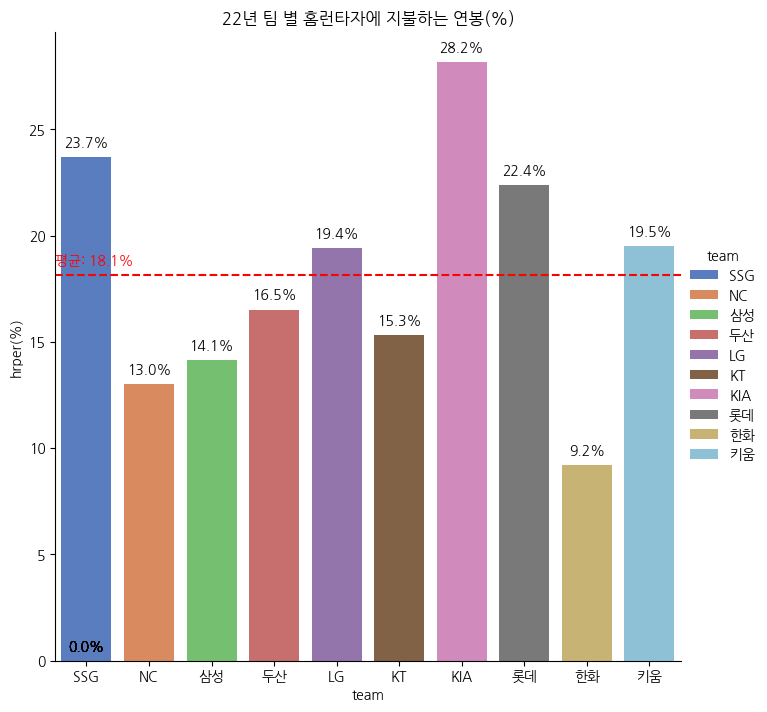

In [210]:

ax = sns.catplot(x = "team", y = "hrper(%)", data = money2022, hue = "team",kind = "bar", palette="muted", legend= True, height = 7)

plt.title("22년 팀 별 홈런타자에 지불하는 연봉(%)")

# 값 표시
for p in ax.ax.patches:
    ax.ax.annotate(f'{p.get_height():.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')

avg_hrper = money2022['hrper(%)'].mean()
ax.ax.axhline(avg_hrper, color='red', linestyle='--')
ax.ax.text(-0.5, avg_hrper + 0.5, f'평균: {avg_hrper:.1f}%', color='red')

plt.show()

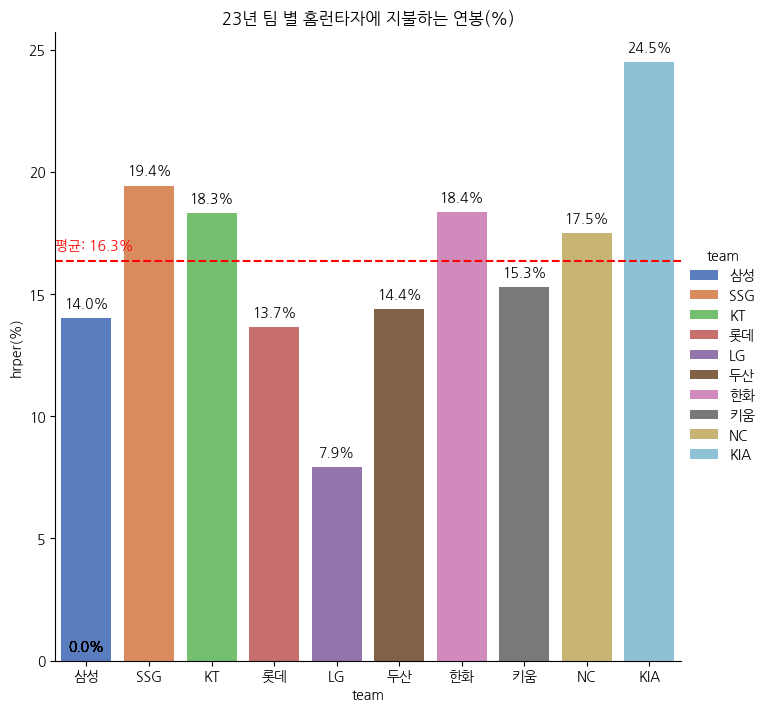

In [208]:

ax = sns.catplot(x = "team", y = "hrper(%)", data = money2023, hue = "team",kind = "bar", palette="muted", legend= True, height = 7)

plt.title("23년 팀 별 홈런타자에 지불하는 연봉(%)")

# 값 표시
for p in ax.ax.patches:
    ax.ax.annotate(f'{p.get_height():.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
avg_hrper = money2023['hrper(%)'].mean()
ax.ax.axhline(avg_hrper, color='red', linestyle='--')
ax.ax.text(-0.5, avg_hrper + 0.5, f'평균: {avg_hrper:.1f}%', color='red')

plt.show()

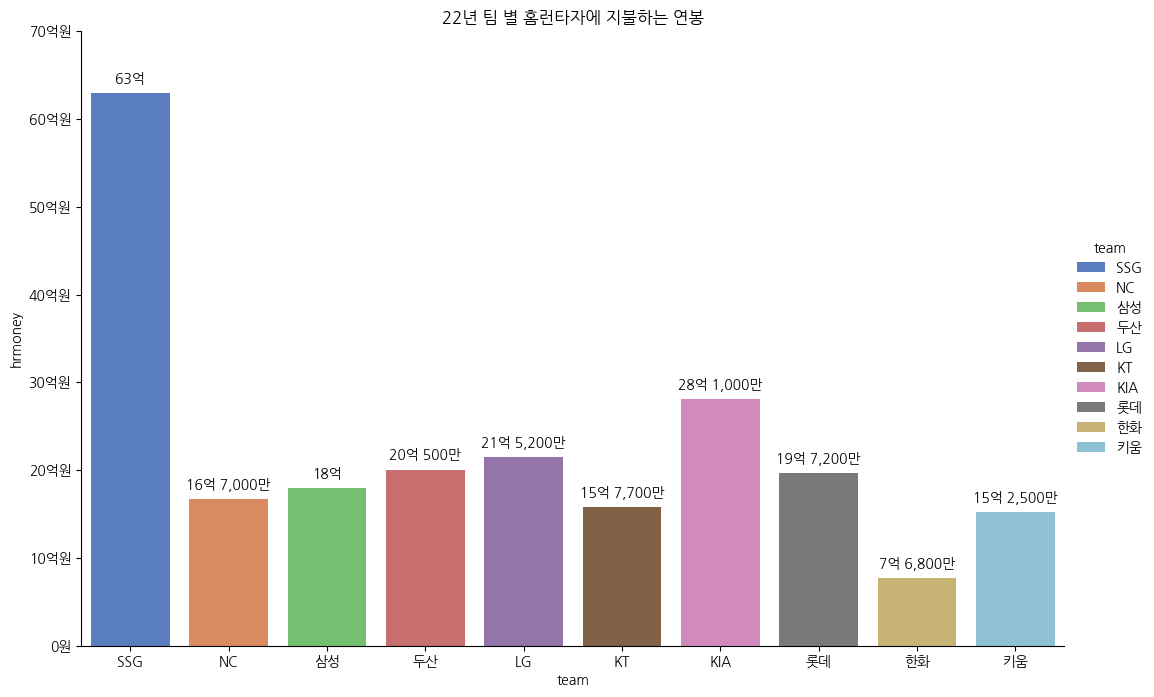

In [227]:
from matplotlib.ticker import FuncFormatter
ax = sns.catplot(x = "team", y = "hrmoney", data = money2022, hue = "team",kind = "bar", palette="muted", legend= True, height = 7, aspect=1.5)

def format_korean_currency(value):
    units = ['', '만', '억', '조']
    result = []
    unit_index = 0
    while value > 0:
        value, mod = divmod(value, 10000)
        if mod > 0:
            result.append(f"{mod:,}{units[unit_index]}")
        unit_index += 1
    return ' '.join(result[::-1])

plt.title("22년 팀 별 홈런타자에 지불하는 연봉")

# 값 표시
for p in ax.ax.patches:
    money_value = int(p.get_height())
    formatted_value = format_korean_currency(money_value)
    ax.ax.annotate(formatted_value, 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
def korean_currency_formatter(x, pos):
    if x == 0:
        return "0원"
    elif x == 7000000000:
        return "70억원"
    else:
        return f"{int(x/100000000)}억원"
    
ax.ax.yaxis.set_major_formatter(FuncFormatter(korean_currency_formatter))
ax.ax.set_ylim(0, 7000000000)

plt.show()

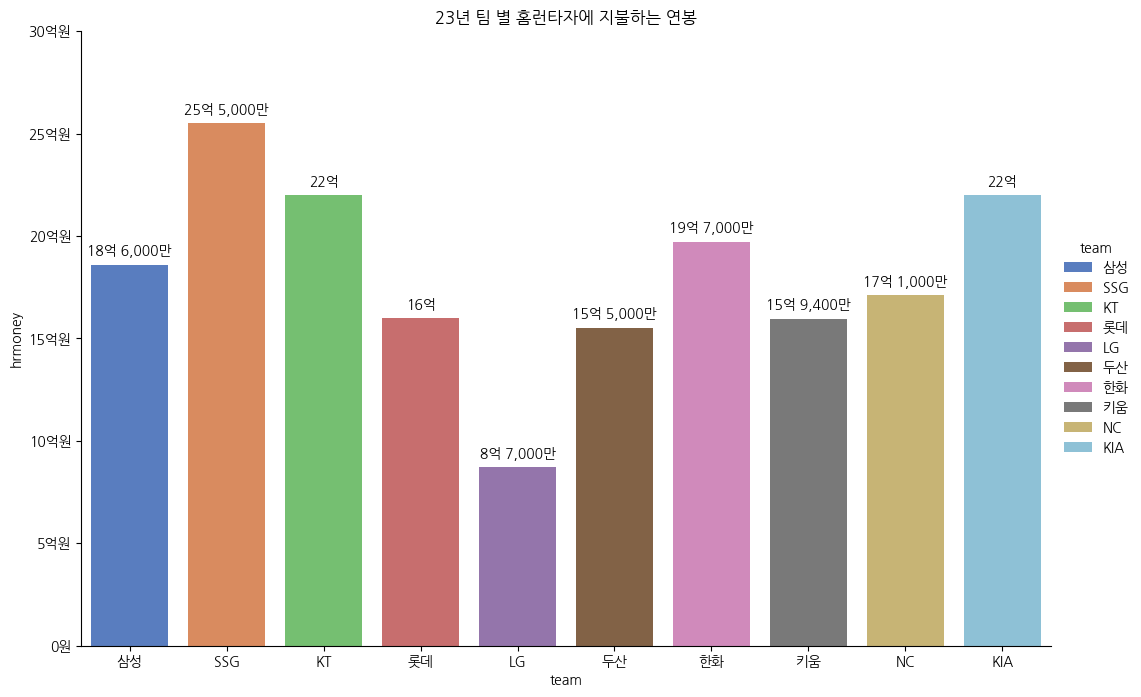

In [226]:
from matplotlib.ticker import FuncFormatter

ax = sns.catplot(x = "team", y = "hrmoney", data = money2023, hue = "team",kind = "bar", palette="muted", legend= True, height = 7, aspect=1.5)

def format_korean_currency(value):
    units = ['', '만', '억', '조']
    result = []
    unit_index = 0
    while value > 0:
        value, mod = divmod(value, 10000)
        if mod > 0:
            result.append(f"{mod:,}{units[unit_index]}")
        unit_index += 1
    return ' '.join(result[::-1])

plt.title("23년 팀 별 홈런타자에 지불하는 연봉")

# 값 표시
for p in ax.ax.patches:
    money_value = int(p.get_height())
    formatted_value = format_korean_currency(money_value)
    ax.ax.annotate(formatted_value, 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
def korean_currency_formatter(x, pos):
    if x == 0:
        return "0원"
    elif x == 3000000000:
        return "30억원"
    else:
        return f"{int(x/100000000)}억원"
    
ax.ax.yaxis.set_major_formatter(FuncFormatter(korean_currency_formatter))
ax.ax.set_ylim(0, 3000000000)

plt.show()

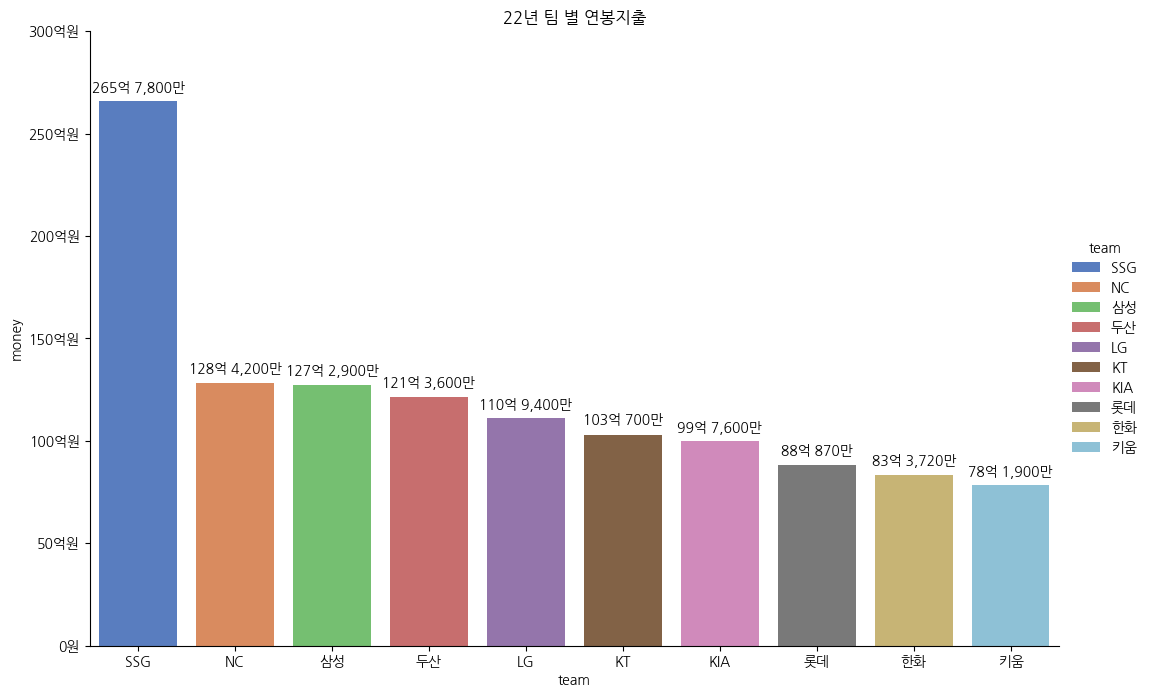

In [229]:
from matplotlib.ticker import FuncFormatter
ax = sns.catplot(x = "team", y = "money", data = money2022, hue = "team",kind = "bar", palette="muted", legend= True, height = 7, aspect=1.5)

def format_korean_currency(value):
    units = ['', '만', '억', '조']
    result = []
    unit_index = 0
    while value > 0:
        value, mod = divmod(value, 10000)
        if mod > 0:
            result.append(f"{mod:,}{units[unit_index]}")
        unit_index += 1
    return ' '.join(result[::-1])

plt.title("22년 팀 별 연봉지출")

# 값 표시
for p in ax.ax.patches:
    money_value = int(p.get_height())
    formatted_value = format_korean_currency(money_value)
    ax.ax.annotate(formatted_value, 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
def korean_currency_formatter(x, pos):
    if x == 0:
        return "0원"
    elif x == 30000000000:
        return "300억원"
    else:
        return f"{int(x/100000000)}억원"
    
ax.ax.yaxis.set_major_formatter(FuncFormatter(korean_currency_formatter))
ax.ax.set_ylim(0, 30000000000)

plt.show()

In [21]:
mykbocursor.execute("select 팀_이름, 장타율_주루율, 팀_타율, 특점권타율, 홈런 from 팀기록_타자 where year = 22;")

result = mykbocursor.fetchall()
corr = pd.DataFrame(result)
corr.columns = ['팀_이름', '장타율_주루율', '팀_타율', '특점권타율', '홈런']
corr

,팀_이름,장타율_주루율,팀_타율,특점권타율,홈런
0,KIA,0.747,0.272,0.273,113
1,삼성,0.721,0.270,0.281,103
2,LG,0.742,0.269,0.274,118
3,롯데,0.711,0.267,0.259,106
4,NC,0.709,0.257,0.265,105
5,두산,0.689,0.255,0.266,101
6,SSG,0.732,0.254,0.272,138
7,KT,0.705,0.254,0.239,119
8,키움,0.697,0.252,0.243,94
9,한화,0.671,0.245,0.237,88


In [31]:
#corr.set_index(["팀_이름"], inplace=True)
corr['point'] = [10-5, 10-7, 10-3, 10-8, 10-6, 10-9, 10-1, 10-4, 10-2, 10-10]

In [32]:
corr.corr()

,장타율_주루율,팀_타율,특점권타율,홈런,point
장타율_주루율,1.000000,0.787112,0.734078,0.705533,0.578212
팀_타율,0.787112,1.000000,0.743731,0.252277,0.073568
특점권타율,0.734078,0.743731,1.000000,0.426704,0.128450
홈런,0.705533,0.252277,0.426704,1.000000,0.665923
point,0.578212,0.073568,0.128450,0.665923,1.000000


In [38]:
mykbocursor.execute("select 팀명, 평균자책점, 피안타율 from 팀기록_투수 where year = 22;")

tworesult = mykbocursor.fetchall()
corrtwo = pd.DataFrame(tworesult)
corrtwo.columns = ['팀명', '평균자책점', '피안타율']
corrtwo.set_index("")

In [36]:
corr = pd.concat([corr, corrtwo])
corr

,장타율_주루율,팀_타율,특점권타율,홈런,point,0,1,2
KIA,0.747,0.272,0.273,113.0,5.0,NaN,NaN,NaN
삼성,0.721,0.270,0.281,103.0,3.0,NaN,NaN,NaN
LG,0.742,0.269,0.274,118.0,7.0,NaN,NaN,NaN
롯데,0.711,0.267,0.259,106.0,2.0,NaN,NaN,NaN
NC,0.709,0.257,0.265,105.0,4.0,NaN,NaN,NaN
두산,0.689,0.255,0.266,101.0,1.0,NaN,NaN,NaN
SSG,0.732,0.254,0.272,138.0,9.0,NaN,NaN,NaN
KT,0.705,0.254,0.239,119.0,6.0,NaN,NaN,NaN
키움,0.697,0.252,0.243,94.0,8.0,NaN,NaN,NaN
한화,0.671,0.245,0.237,88.0,0.0,NaN,NaN,NaN
